In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [88]:
datagen = ImageDataGenerator(
    rescale=1./255
)

In [89]:
training_data = datagen.flow_from_directory(
      './Datasets/bears_ws/bears/training',
    target_size=(256, 256),
    batch_size=10,
    class_mode='categorical',
    classes=['grizzly', 'panda', 'polar']
)

Found 718 images belonging to 3 classes.


In [90]:
print(training_data.image_shape)

(256, 256, 3)


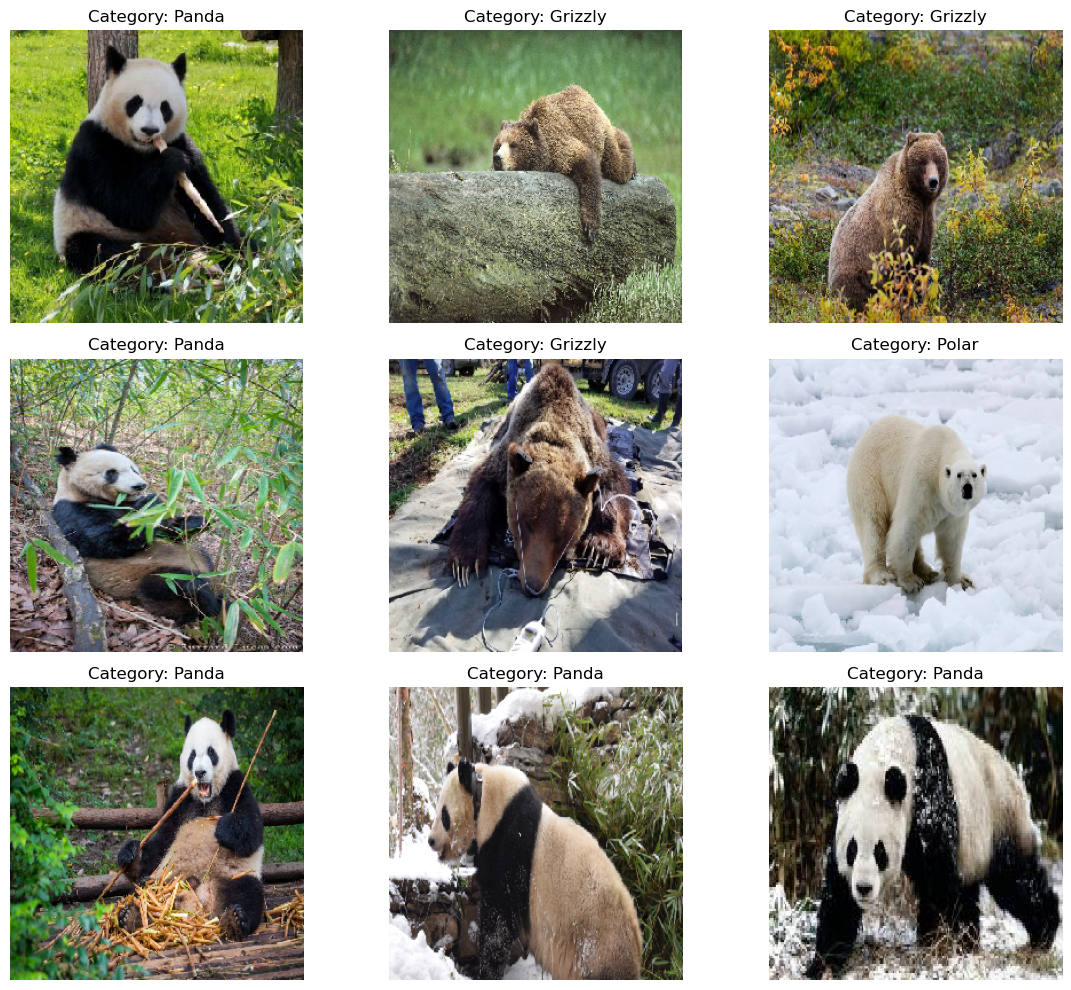

In [91]:
rows = 3
cols = 3

plt.figure(figsize=(12, 10))

images, labels = next(training_data)

categories = ['Grizzly', 'Panda', 'Polar']

for i in range(rows * cols):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(images[i])  
    category_index = np.argmax(labels[i])
    plt.title(f'Category: {categories[category_index]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

<br></br>
<h4>Let's try to overfit the model with just few layers and parameters.</h4>

In [18]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.metrics import Precision, Recall

In [38]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=training_data.image_shape),
    MaxPooling2D(5,5),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(5, 5),
    Conv2D(8, (3,3), activation = 'relu'),
    MaxPooling2D(5, 5),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(3, activation = 'softmax')
])

In [39]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 48, 48, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 9, 9, 16)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1, 1, 8)         

In [48]:
# from tensorflow.keras.utils import plot_model

# plot_model(model, show_layer_names = True, show_shapes = True)

In [41]:
history = model.fit(training_data, epochs=20)

Epoch 1/20
72/72 [==============================] - 23s 291ms/step - loss: 1.0453 - accuracy: 0.4805 - precision_2: 0.8667 - recall_2: 0.0181
Epoch 2/20
72/72 [==============================] - 21s 287ms/step - loss: 0.8368 - accuracy: 0.6462 - precision_2: 0.7494 - recall_2: 0.4290
Epoch 3/20
72/72 [==============================] - 21s 285ms/step - loss: 0.6834 - accuracy: 0.7201 - precision_2: 0.7856 - recall_2: 0.6072
Epoch 4/20
72/72 [==============================] - 21s 289ms/step - loss: 0.5103 - accuracy: 0.8078 - precision_2: 0.8483 - recall_2: 0.7632
Epoch 5/20
72/72 [==============================] - 21s 297ms/step - loss: 0.4620 - accuracy: 0.8370 - precision_2: 0.8607 - recall_2: 0.8092
Epoch 6/20
72/72 [==============================] - 21s 287ms/step - loss: 0.4309 - accuracy: 0.8454 - precision_2: 0.8660 - recall_2: 0.8189
Epoch 7/20
72/72 [==============================] - 21s 288ms/step - loss: 0.4499 - accuracy: 0.8301 - precision_2: 0.8529 - recall_2: 0.7994
Epoch 

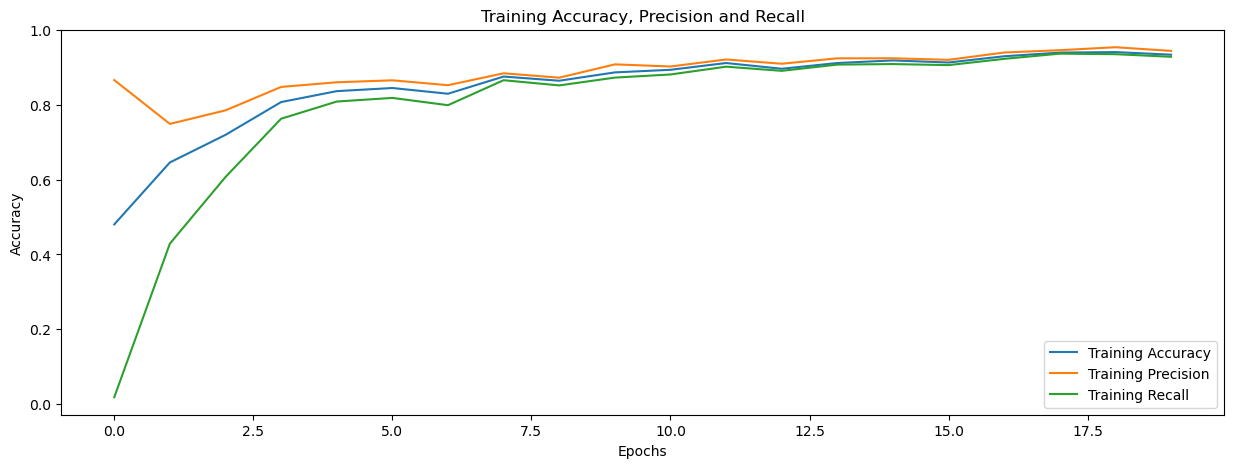

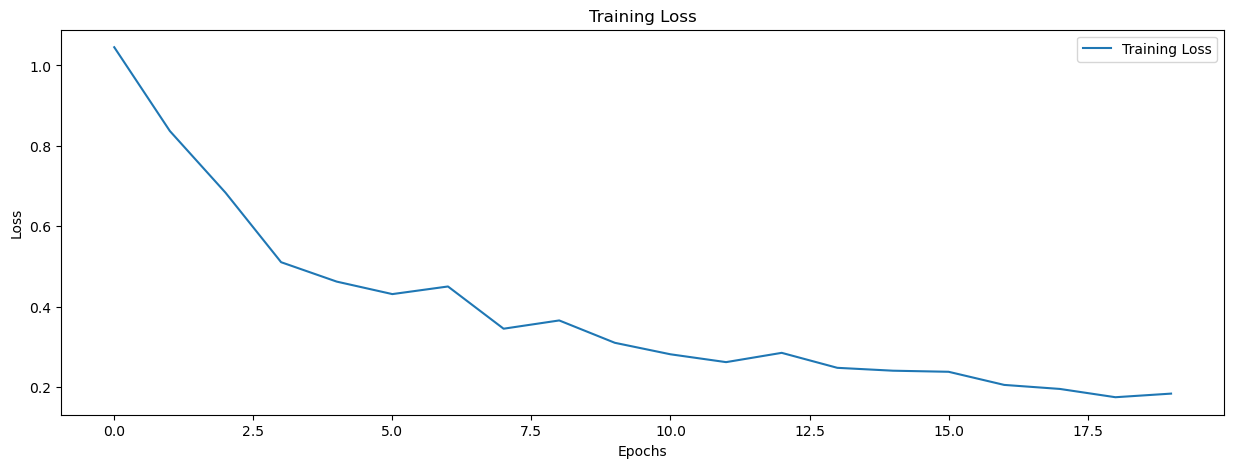

In [42]:
accuracy = history.history['accuracy']
loss = history.history['loss']
precision = history.history['precision_2']
recall = history.history['recall_2']

epochs_range = range(len(accuracy))


# Plotting Training Accuracy, Precision and Recall
plt.figure(figsize=(15, 5))
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, precision, label='Training Precision')
plt.plot(epochs_range, recall, label='Training Recall')
plt.title('Training Accuracy, Precision and Recall')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')

# Plotting Training Loss
plt.figure(figsize=(15, 5))
plt.plot(epochs_range, loss, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Hmm!, Seems getting close, let's mess up the model again with some changes of layers and filters.

<br></br>
<h5>Let's try another architecture and see how the model gonna perform.</h5>

In [58]:
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=training_data.image_shape),
    Conv2D(16, (3, 3), activation='relu'),
    Conv2D(8, (3,3), activation = 'relu'),
    MaxPooling2D(5, 5),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation = 'relu'),
    Dense(3, activation = 'softmax')
])

In [59]:
model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

In [60]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 conv2d_19 (Conv2D)          (None, 252, 252, 16)      4624      
                                                                 
 conv2d_20 (Conv2D)          (None, 250, 250, 8)       1160      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 50, 50, 8)        0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 20000)             0         
                                                                 
 dense_15 (Dense)            (None, 64)                1280064   
                                                      

In [46]:
history_1 = model_1.fit(training_data, epochs = 20)

Epoch 1/20
72/72 [==============================] - 72s 962ms/step - loss: 0.7905 - accuracy: 0.6323 - precision_3: 0.7187 - recall_3: 0.4875
Epoch 2/20
72/72 [==============================] - 73s 1s/step - loss: 0.4670 - accuracy: 0.8175 - precision_3: 0.8444 - recall_3: 0.7939
Epoch 3/20
72/72 [==============================] - 73s 1s/step - loss: 0.2909 - accuracy: 0.8942 - precision_3: 0.9036 - recall_3: 0.8747
Epoch 4/20
72/72 [==============================] - 77s 1s/step - loss: 0.1959 - accuracy: 0.9290 - precision_3: 0.9347 - recall_3: 0.9164
Epoch 5/20
72/72 [==============================] - 75s 1s/step - loss: 0.1203 - accuracy: 0.9526 - precision_3: 0.9592 - recall_3: 0.9485
Epoch 6/20
72/72 [==============================] - 73s 1s/step - loss: 0.0941 - accuracy: 0.9708 - precision_3: 0.9721 - recall_3: 0.9694
Epoch 7/20
72/72 [==============================] - 74s 1s/step - loss: 0.0151 - accuracy: 0.9986 - precision_3: 0.9986 - recall_3: 0.9986
Epoch 8/20
72/72 [======

Interestingly, we achieved 100% with the second model. 

Model architecture is: 3 Convolution, 1 MaxPool2D and 3 Dense.

<h5>Let's plot the learning curves:</h5>

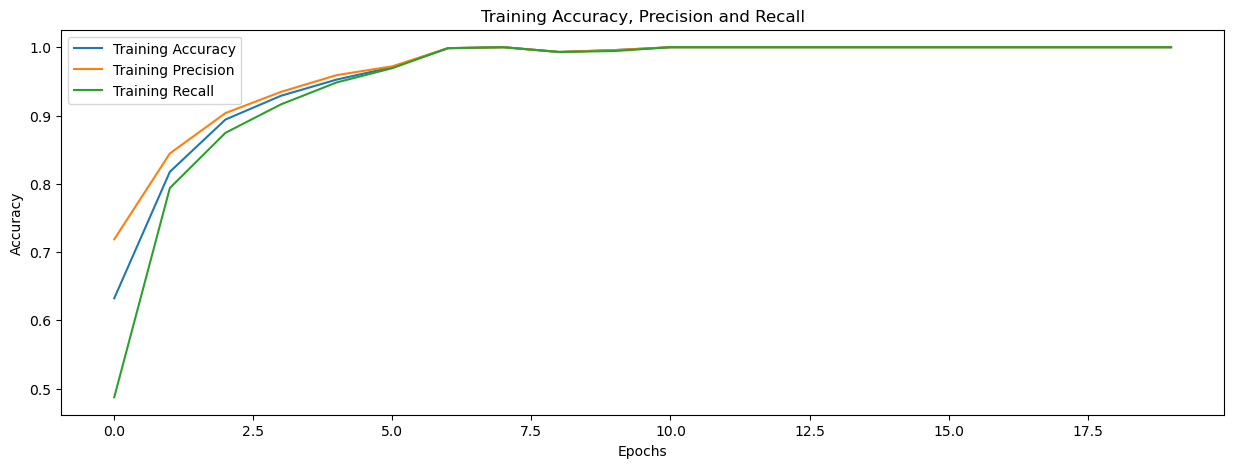

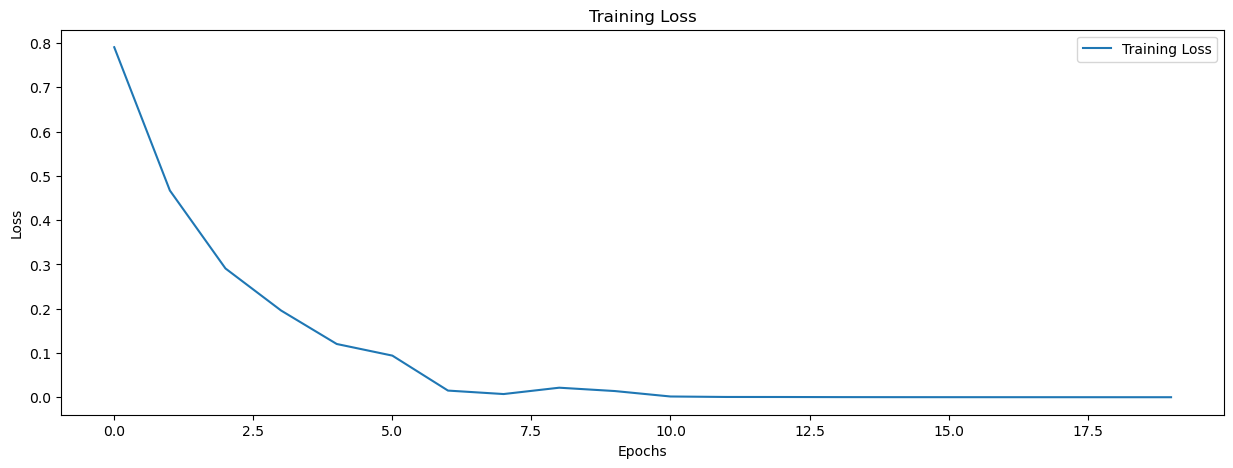

In [51]:
acc = history_1.history['accuracy']
loss = history_1.history['loss']
precision = history_1.history['precision_3']
recall = history_1.history['recall_3']

epochs_range = range(len(acc))

plt.figure(figsize = (15,5))
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, precision, label = 'Training Precision')
plt.plot(epochs_range, recall, label = 'Training Recall')
plt.title('Training Accuracy, Precision and Recall')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(figsize = (15,5))
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<h5>Let's decrease some filters and see how the model will perform</h5>

In [63]:
model_2 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=training_data.image_shape),
    Conv2D(8, (3, 3), activation='relu'),
    Conv2D(4, (3,3), activation = 'relu'),
    MaxPooling2D(5, 5),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(16, activation = 'relu'),
    Dense(3, activation = 'softmax')
])

In [64]:
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

In [65]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 conv2d_22 (Conv2D)          (None, 252, 252, 8)       1160      
                                                                 
 conv2d_23 (Conv2D)          (None, 250, 250, 4)       292       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 50, 50, 4)        0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 10000)             0         
                                                                 
 dense_18 (Dense)            (None, 32)                320032    
                                                      

In [66]:
history_2 = model_2.fit(training_data, epochs = 15)

Epoch 1/15
72/72 [==============================] - 50s 684ms/step - loss: 1.1028 - accuracy: 0.3370 - precision_6: 0.2381 - recall_6: 0.0070
Epoch 2/15
72/72 [==============================] - 53s 732ms/step - loss: 0.9659 - accuracy: 0.5613 - precision_6: 0.6154 - recall_6: 0.1114
Epoch 3/15
72/72 [==============================] - 49s 679ms/step - loss: 0.8252 - accuracy: 0.6699 - precision_6: 0.7013 - recall_6: 0.3663
Epoch 4/15
72/72 [==============================] - 49s 673ms/step - loss: 0.6528 - accuracy: 0.7939 - precision_6: 0.8063 - recall_6: 0.6435
Epoch 5/15
72/72 [==============================] - 50s 693ms/step - loss: 0.4449 - accuracy: 0.8426 - precision_6: 0.8544 - recall_6: 0.8092
Epoch 6/15
72/72 [==============================] - 48s 662ms/step - loss: 0.3475 - accuracy: 0.8760 - precision_6: 0.8823 - recall_6: 0.8663
Epoch 7/15
72/72 [==============================] - 51s 704ms/step - loss: 0.2198 - accuracy: 0.9290 - precision_6: 0.9312 - recall_6: 0.9234
Epoch 

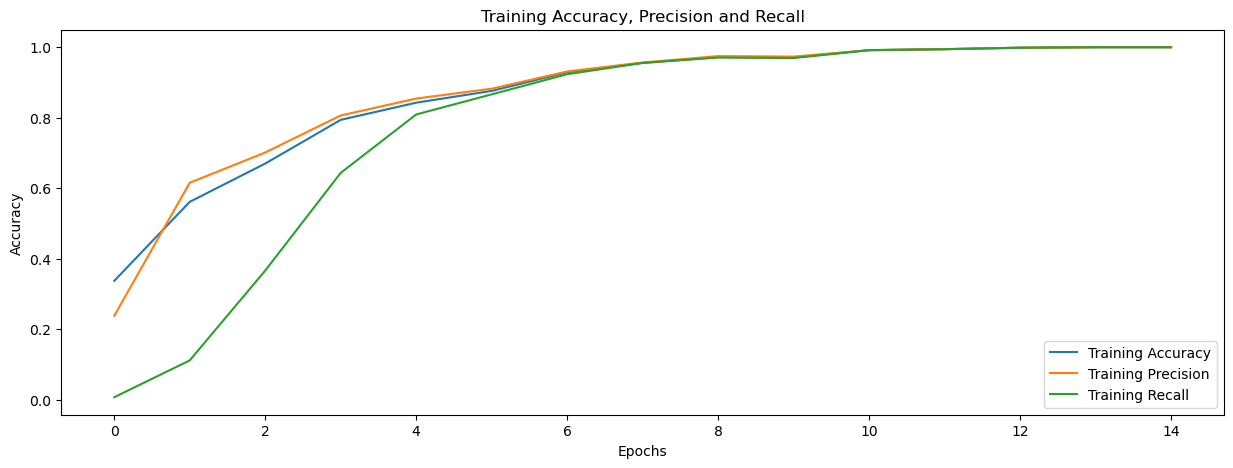

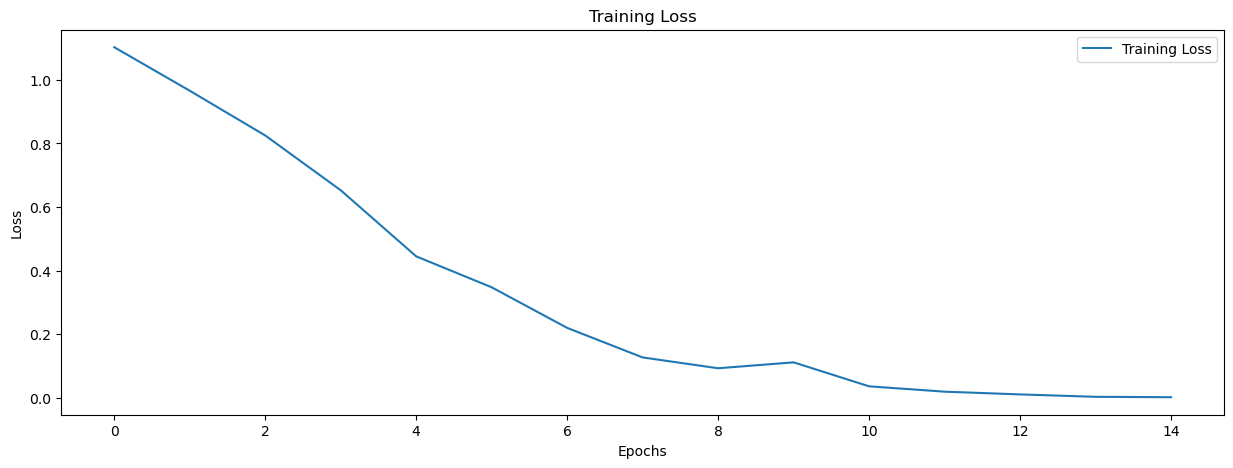

In [68]:
acc = history_2.history['accuracy']
loss = history_2.history['loss']
precision = history_2.history['precision_6']
recall = history_2.history['recall_6']

epochs_range = range(len(acc))

plt.figure(figsize = (15,5))
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, precision, label = 'Training Precision')
plt.plot(epochs_range, recall, label = 'Training Recall')
plt.title('Training Accuracy, Precision and Recall')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')

plt.figure(figsize = (15,5))
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

1) We got the 100% accuracy at the 11th epoch with model_1. 

**Model_1 Architecture:** 
<ul>
    <li>3 Convolution layers with 32, 16, 8 kernels.</li>
    <li>1 MaxPool with 5*5 filters</li>
    <li>3 Dense layers with 64, 32, 3(output) neurons</li>
</ul>


2) With model_2 we achieved 100% in 14th epoch.

**Model_2 Architecture:** 
<ul>
    <li>3 Convolution layers with 16, 8, 4 kernels.</li>
    <li>1 MaxPool with 5*5 filters</li>
    <li>3 Dense layers with 32, 16, 3(output) neurons</li>
</ul>

<br></br>
<h4>Output labels as additional Input channel</h4>

In [107]:
total_samples = training_data.n
image_shape = training_data.image_shape

In [108]:
mydatax = np.zeros((total_samples, image_shape[0], image_shape[1], image_shape[2] + 1))
mydatay = np.zeros((total_samples, training_data.num_classes))

In [109]:
index = 0
while index < total_samples:
    x, y = next(training_data)
    for i in range(x.shape[0]):
        if index >= total_samples:
            break
        mydatax[index, :, :, :3] = x[i]
        # Add the label as an additional channel, replicated across the whole image
        label_channel = np.argmax(y[i])
        mydatax[index, :, :, 3] = label_channel  # Set the entire channel to the label index
        mydatay[index] = y[i]
        index += 1

In [110]:
model_3 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 4)),
    Conv2D(8, (3, 3), activation='relu'),
    Conv2D(4, (3,3), activation = 'relu'),
    MaxPooling2D(5, 5),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(16, activation = 'relu'),
    Dense(3, activation = 'softmax')
])

In [111]:
model_3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

In [112]:
model_3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 254, 254, 16)      592       
                                                                 
 conv2d_34 (Conv2D)          (None, 252, 252, 8)       1160      
                                                                 
 conv2d_35 (Conv2D)          (None, 250, 250, 4)       292       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 50, 50, 4)        0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 10000)             0         
                                                                 
 dense_30 (Dense)            (None, 32)                320032    
                                                     

In [113]:
history_3 = model_3.fit(mydatax, mydatay, epochs=10)

Epoch 1/10
23/23 [==============================] - 46s 2s/step - loss: 0.7943 - accuracy: 0.5696 - precision_10: 0.6933 - recall_10: 0.3872
Epoch 2/10
23/23 [==============================] - 46s 2s/step - loss: 0.3771 - accuracy: 0.9081 - precision_10: 0.8944 - recall_10: 0.7549
Epoch 3/10
23/23 [==============================] - 45s 2s/step - loss: 0.0161 - accuracy: 0.9972 - precision_10: 0.9972 - recall_10: 0.9972
Epoch 4/10
23/23 [==============================] - 43s 2s/step - loss: 0.0207 - accuracy: 0.9944 - precision_10: 0.9944 - recall_10: 0.9944
Epoch 5/10
23/23 [==============================] - 44s 2s/step - loss: 0.0457 - accuracy: 0.9847 - precision_10: 0.9847 - recall_10: 0.9847
Epoch 6/10
23/23 [==============================] - 44s 2s/step - loss: 0.0072 - accuracy: 0.9972 - precision_10: 0.9972 - recall_10: 0.9972
Epoch 7/10
23/23 [==============================] - 43s 2s/step - loss: 0.0015 - accuracy: 1.0000 - precision_10: 1.0000 - recall_10: 1.0000
Epoch 8/10
23

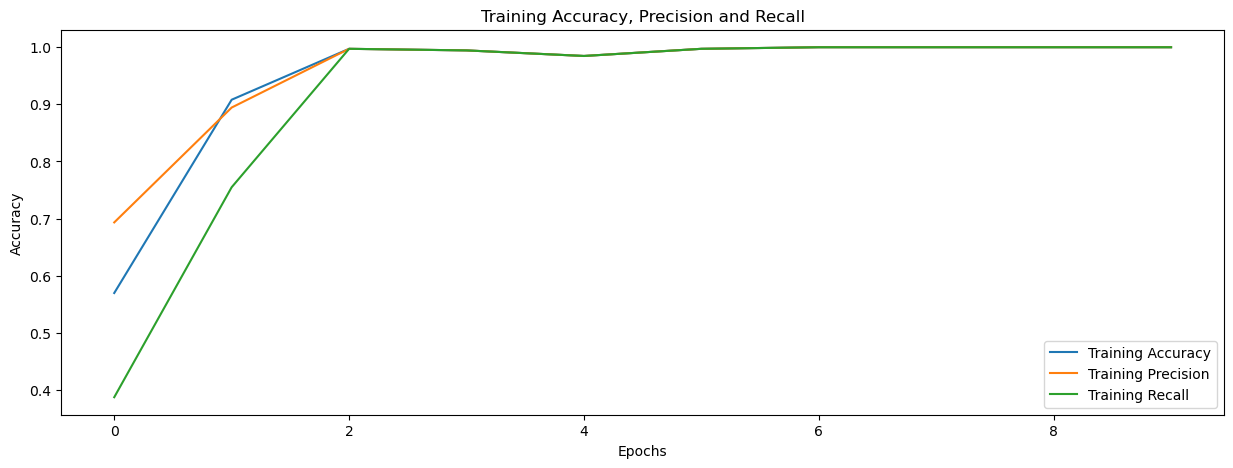

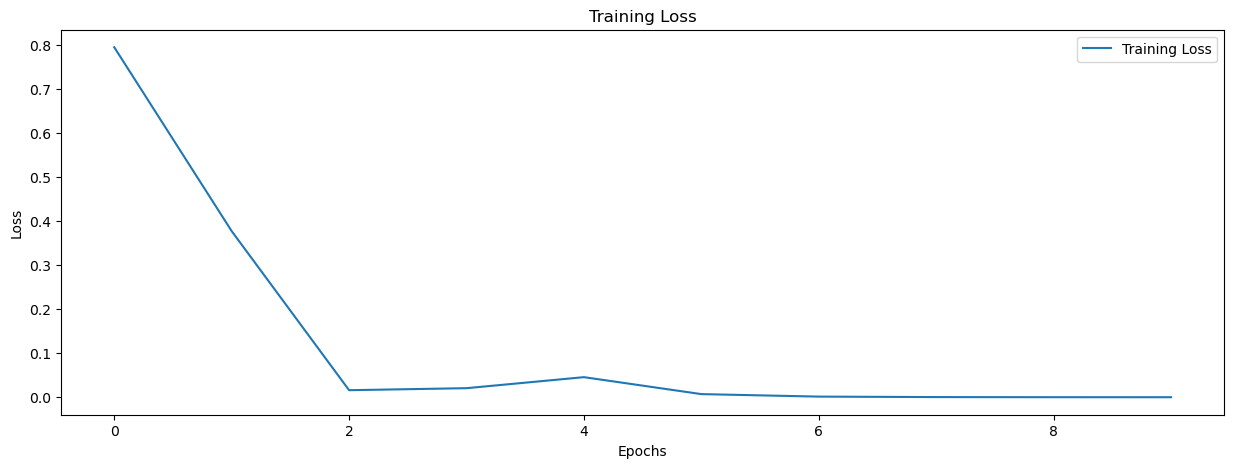

In [122]:
acc = history_3.history['accuracy']
loss = history_3.history['loss']
precision = history_3.history['precision_10']
recall = history_3.history['recall_10']

epochs_range = range(len(acc))

plt.figure(figsize = (15,5))
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, precision, label = 'Training Precision')
plt.plot(epochs_range, recall, label = 'Training Recall')
plt.title('Training Accuracy, Precision and Recall')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')

plt.figure(figsize = (15,5))
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

We can see with the below model arcchitecture we achieved 100% while taking output labels as additional input channel.

**Model_3 architecture:**
<ul>
    <li>3 Convolution layers with 16, 8, 4 kernels.</li>
    <li>1 MaxPool with 5*5 filters</li>
    <li>3 Dense layers with 32, 18, 3(output) neurons</li>
</ul>

<h5>Let's try another architecture</h5>

In [118]:
model_4 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 4)),
    MaxPooling2D(5, 5),
    Conv2D(8, (3,3), activation = 'relu'),
    MaxPooling2D(5, 5),
    Flatten(),
    Dense(10, activation = 'relu'),
    Dense(3, activation = 'softmax')
])

In [119]:
model_4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

In [120]:
model_4.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 254, 254, 16)      592       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 50, 50, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 48, 48, 8)         1160      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 9, 9, 8)          0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 648)               0         
                                                                 
 dense_35 (Dense)            (None, 10)              

In [121]:
history_4

model_4.fit(mydatax, mydatay, epochs=15)

Epoch 1/15
23/23 [==============================] - 14s 523ms/step - loss: 0.9323 - accuracy: 0.4359 - precision_12: 0.6713 - recall_12: 0.2674
Epoch 2/15
23/23 [==============================] - 11s 485ms/step - loss: 0.5890 - accuracy: 0.6518 - precision_12: 0.6799 - recall_12: 0.6212
Epoch 3/15
23/23 [==============================] - 11s 480ms/step - loss: 0.4277 - accuracy: 0.6755 - precision_12: 0.7049 - recall_12: 0.6755
Epoch 4/15
23/23 [==============================] - 11s 485ms/step - loss: 0.3500 - accuracy: 0.6769 - precision_12: 0.8679 - recall_12: 0.6769
Epoch 5/15
23/23 [==============================] - 12s 503ms/step - loss: 0.3136 - accuracy: 0.6838 - precision_12: 0.9184 - recall_12: 0.6741
Epoch 6/15
23/23 [==============================] - 12s 508ms/step - loss: 0.2790 - accuracy: 0.7201 - precision_12: 0.9474 - recall_12: 0.6769
Epoch 7/15
23/23 [==============================] - 11s 493ms/step - loss: 0.2497 - accuracy: 0.8733 - precision_12: 0.9759 - recall_12:

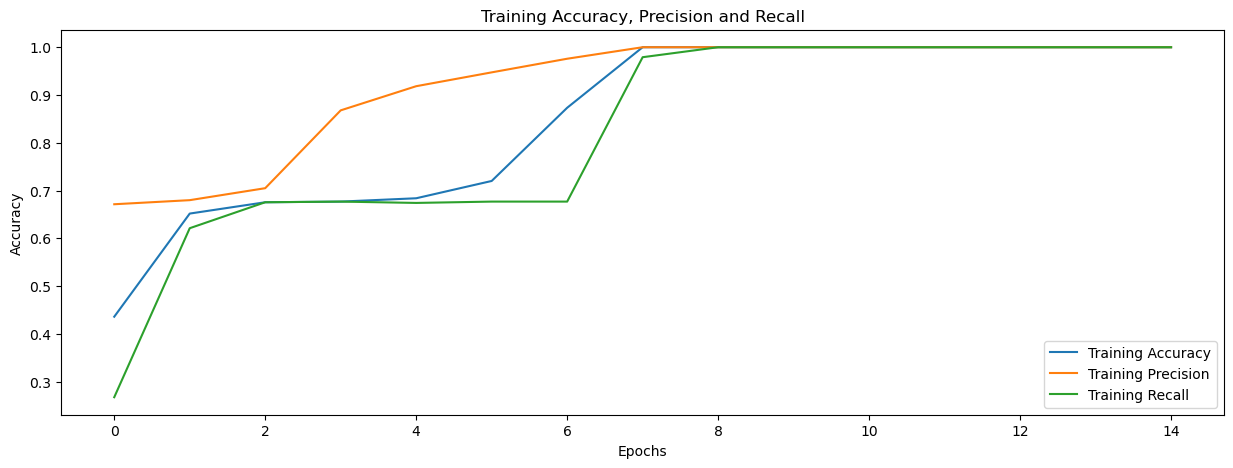

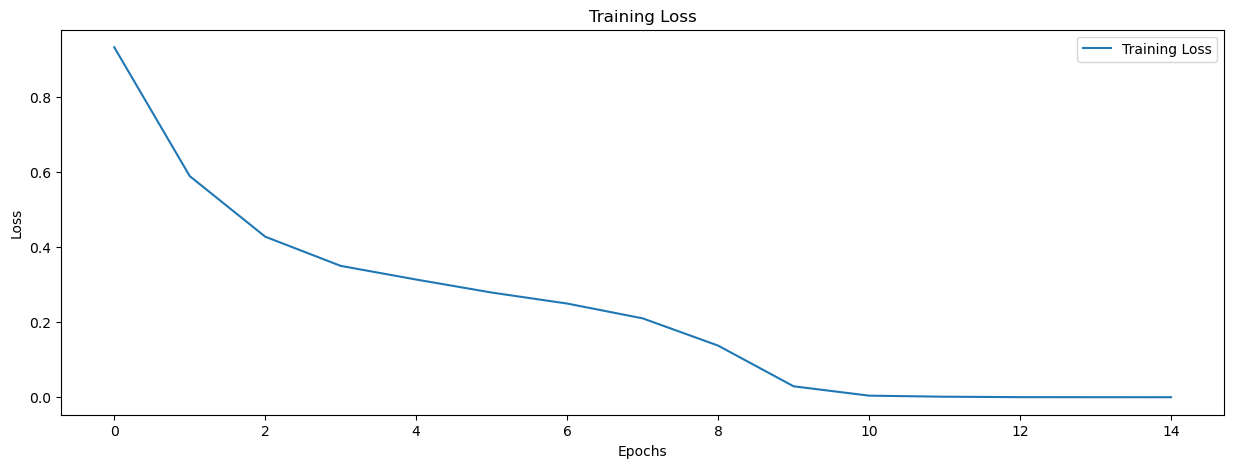

In [123]:
acc = history_4.history['accuracy']
loss = history_4.history['loss']
precision = history_4.history['precision_12']
recall = history_4.history['recall_12']

epochs_range = range(len(acc))

plt.figure(figsize = (15,5))
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, precision, label = 'Training Precision')
plt.plot(epochs_range, recall, label = 'Training Recall')
plt.title('Training Accuracy, Precision and Recall')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')

plt.figure(figsize = (15,5))
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Model_4 architecture:**

We acheived 100% with below architecture which is smaller than model_3
<ul>
    <li>2 Convolution layers with 16, 8 kernels.</li>
    <li>2 MaxPool with 5*5 filters</li>
    <li>2 Dense layers with 10, 3(output) neurons</li>
</ul>